# 😮 Video Games influencing Violence? 😮

First, imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Jupyter magic so graphs and things are stored in the notebook instead of the default behaviour which is to save it as a file.

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
saved_style_state = matplotlib.rcParams.copy()

Lets start by loading our data

In [4]:
if os.path.isfile("rci-offencebymonth.csv"):
    filepath = "rci-offencebymonth.csv"
    print("loading from file")
else:
    filepath = "http://data.gov.au/storage/f/2013-09-12T23%3A32%3A36.918Z/rci-offencebymonth.csv"
    print("loading from the internet")

offence_data = pd.read_csv("rci-offencebymonth.csv")
print("done")

loading from file
done


I've put together a few popular video games and their release dates in the .csv below

In [5]:
if os.path.isfile("VideoGameData.csv"):
    filepath = "VideoGameData.csv"
    print("loading from file")

game_data = pd.read_csv("VideoGameData.csv")
print("done")

loading from file
done


Here we can see how our data is structured

In [6]:
offence_data.head()

,Statistical Division or Subdivision,LGA,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,...,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012
0,Inner Sydney,Botany Bay,Homicide,Murder (a),0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Inner Sydney,Botany Bay,Homicide,Attempted murder,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Inner Sydney,Botany Bay,Homicide,"Murder accessory, conspiracy",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Inner Sydney,Botany Bay,Homicide,Manslaughter (a),0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Inner Sydney,Botany Bay,Assault,Domestic violence related assault,3.0,7.0,5.0,1.0,3.0,4.0,...,17.0,9.0,16.0,10.0,8.0,6.0,11.0,11.0,14.0,20.0


And the next set of data

In [7]:
game_data.head()

,Video Game,Release Date
0,Doom 3,Aug 2004
1,Team Fortress 2,Oct 2007
2,Grand Theft Auto IV,Apr 2008
3,League of Legends,Oct 2009
4,Minecraft,Noc 2011


Lets take a look at how many offences are represented in our offences data sheet

In [8]:
offence_types = offence_data['Offence category']
offence_types.head(10)

0                    Homicide
1                    Homicide
2                    Homicide
3                    Homicide
4                     Assault
5                     Assault
6                     Assault
7             Sexual offences
8             Sexual offences
9    Abduction and kidnapping
Name: Offence category, dtype: object

Taking a peek it looks like we have a number of duplicated values using only this metric. This is because our dataset tracks statistic for separate suburbs.

In [9]:
offence_types = pd.DataFrame(offence_data['Offence category'].unique())
offence_types 

,0
0,Homicide
1,Assault
2,Sexual offences
3,Abduction and kidnapping
4,Robbery
5,Blackmail and extortion
6,"Harassment, threatening behaviour and private ..."
7,Other offences against the person
8,Theft
9,Arson


Lets take a look at the stats behind these categories

In [10]:
sum_of_offences = offence_data.groupby('Offence category').sum()
sum_of_offences

,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,Oct 1995,...,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012
Offence category,,,,,,,,,,,,,,,,,,,,,
Abduction and kidnapping,15.0,16.0,23.0,22.0,14.0,13.0,19.0,23.0,13.0,21.0,...,23.0,26.0,31.0,20.0,21.0,40.0,29.0,26.0,31.0,27.0
Against justice procedures,1276.0,1168.0,1331.0,1188.0,1283.0,1225.0,1245.0,1266.0,1349.0,1363.0,...,4200.0,4236.0,4154.0,4063.0,4022.0,3819.0,4168.0,4342.0,4453.0,4578.0
Arson,269.0,199.0,209.0,252.0,231.0,229.0,280.0,305.0,273.0,329.0,...,548.0,585.0,620.0,498.0,519.0,660.0,736.0,657.0,570.0,560.0
Assault,3227.0,3044.0,3188.0,2977.0,2863.0,2891.0,2935.0,3184.0,3258.0,3584.0,...,5680.0,5370.0,5054.0,4715.0,4971.0,5234.0,5304.0,5375.0,5579.0,6047.0
Betting and gaming offences,3.0,3.0,6.0,8.0,4.0,7.0,5.0,2.0,3.0,4.0,...,13.0,25.0,6.0,5.0,7.0,9.0,9.0,2.0,2.0,19.0
Blackmail and extortion,1.0,2.0,2.0,1.0,3.0,1.0,0.0,2.0,3.0,1.0,...,5.0,5.0,9.0,7.0,9.0,15.0,13.0,12.0,11.0,10.0
Disorderly conduct,1279.0,1117.0,1116.0,1068.0,1006.0,944.0,908.0,911.0,965.0,985.0,...,2038.0,1993.0,1792.0,1849.0,1889.0,1835.0,1960.0,1972.0,2048.0,2302.0
Drug offences,1495.0,1710.0,2052.0,1803.0,1635.0,1669.0,1436.0,1532.0,1397.0,1461.0,...,3720.0,3727.0,3746.0,3563.0,3965.0,3557.0,3673.0,3516.0,3821.0,3982.0
"Harassment, threatening behaviour and private nuisance",346.0,331.0,433.0,416.0,476.0,533.0,517.0,621.0,615.0,574.0,...,2569.0,2349.0,2493.0,2155.0,2307.0,2701.0,2533.0,2628.0,2636.0,2428.0


To plot these we'll transpose our table

In [11]:
sum_of_offences = sum_of_offences.T

Now we can plot our data using fewer arguments to plot()

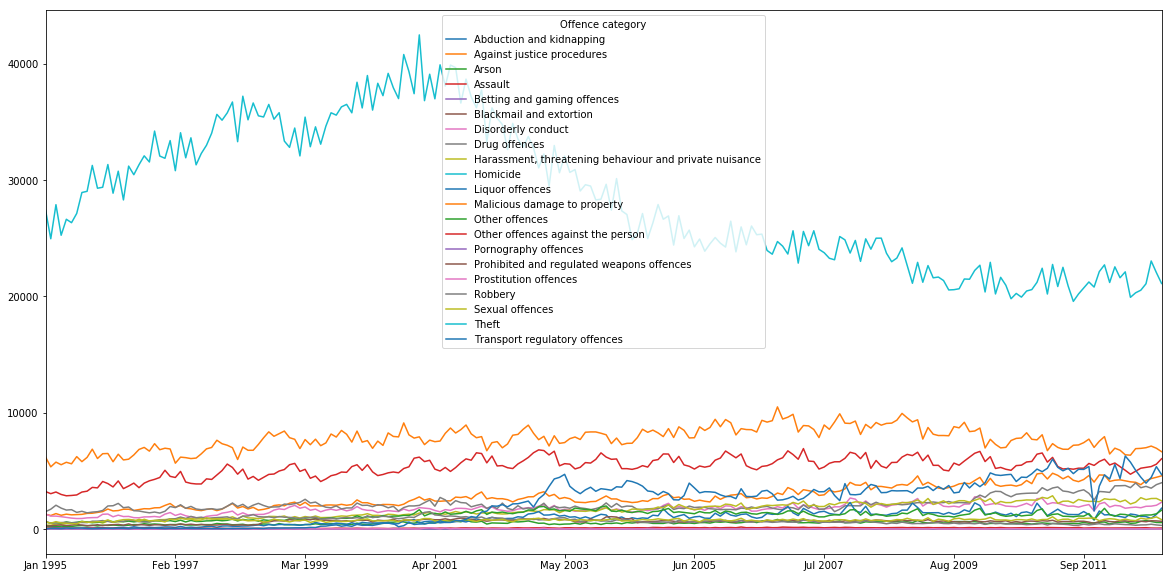

In [12]:
sum_of_offences.plot()

There's alot represented here, and it's clear that incidence of theft is far greater than many of the other offence catagories.
lets focus on offences that seem more related the rage-inducing effects of video games


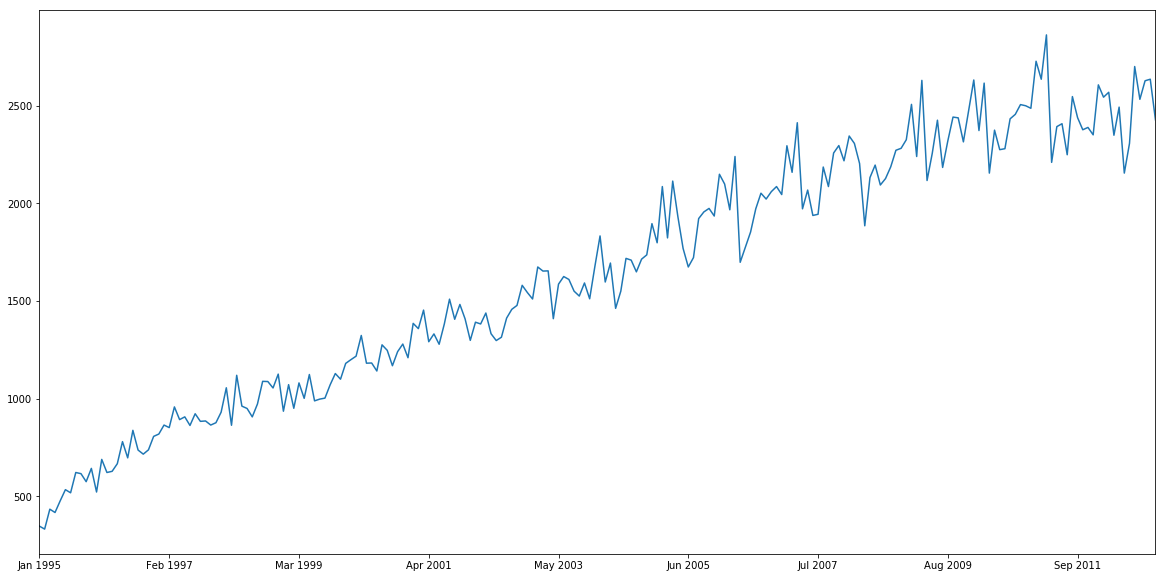

In [19]:
sum_of_offences['Harassment, threatening behaviour and private nuisance'].plot()

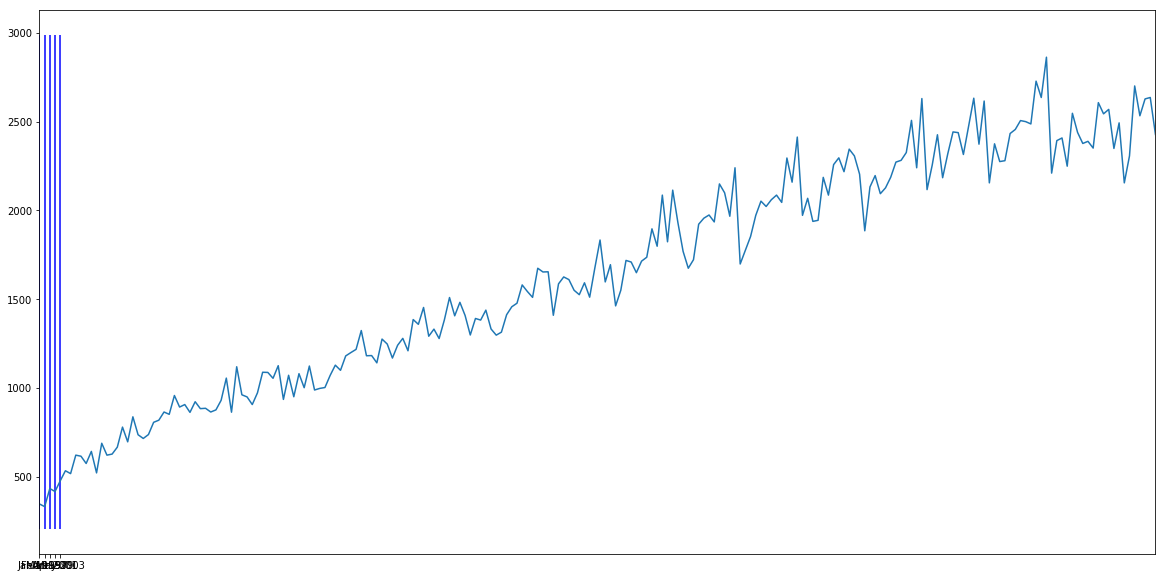

In [72]:
axes = sum_of_offences['Harassment, threatening behaviour and private nuisance'].plot()
ymin, ymax, = axes.get_ylim()
axes.vlines(x=game_data['Release Date'].tolist(), ymin=ymin, ymax=ymax-1, color='b')

In [48]:
for i in range(len(game_data)) : 
  print(game_data.loc[i, "Video Game"], game_data.loc[i, "Release Date"]) 

game_data.loc[i, "Video Game"]
game_data['Release Date'].values

Doom 3 Aug 2004
Team Fortress 2 Oct 2007
Grand Theft Auto IV Apr 2008
League of Legends Oct 2009
Minecraft Noc 2011


array(['Aug 2004', 'Oct 2007', 'Apr 2008', 'Oct 2009', 'Noc 2011'],
      dtype=object)

In [60]:
rd = game_data['Release Date'].values
rd

array(['Aug 2004', 'Oct 2007', 'Apr 2008', 'Oct 2009', 'Noc 2011'],
      dtype=object)

In [61]:
sum_of_offences['Harassment, threatening behaviour and private nuisance'].index[0]

'Jan 1995'

In [69]:
game_data['Release Date'].tolist()

['Aug 2004', 'Oct 2007', 'Apr 2008', 'Oct 2009', 'Noc 2011']

In [79]:
df = game_data
df.loc[df.isin(['Oct 2007']).any(axis=1)].index.tolist()

[]

In [89]:
hoff = sum_of_offences['Harassment, threatening behaviour and private nuisance']
hoff['May 1995'].index

AttributeError: 'numpy.float64' object has no attribute 'index'

In [95]:
hoff.isin(['May 1995'])

Jan 1995    False
Feb 1995    False
Mar 1995    False
Apr 1995    False
May 1995    False
Jun 1995    False
Jul 1995    False
Aug 1995    False
Sep 1995    False
Oct 1995    False
Nov 1995    False
Dec 1995    False
Jan 1996    False
Feb 1996    False
Mar 1996    False
Apr 1996    False
May 1996    False
Jun 1996    False
Jul 1996    False
Aug 1996    False
Sep 1996    False
Oct 1996    False
Nov 1996    False
Dec 1996    False
Jan 1997    False
Feb 1997    False
Mar 1997    False
Apr 1997    False
May 1997    False
Jun 1997    False
            ...  
Jul 2010    False
Aug 2010    False
Sep 2010    False
Oct 2010    False
Nov 2010    False
Dec 2010    False
Jan 2011    False
Feb 2011    False
Mar 2011    False
Apr 2011    False
May 2011    False
Jun 2011    False
Jul 2011    False
Aug 2011    False
Sep 2011    False
Oct 2011    False
Nov 2011    False
Dec 2011    False
Jan 2012    False
Feb 2012    False
Mar 2012    False
Apr 2012    False
May 2012    False
Jun 2012    False
Jul 2012  

In [75]:
game_series = pd.Series(game_data['Release Date'])
pattern_of_bools = ["o" in x for x in game_series]
print(pattern_of_bools)

[False, False, False, False, True]


In [ ]:
game_data["Release Date"]

In [ ]:
game_data["Release Date"].hist()

In [ ]:
offence_data.columns

In [ ]:
offence_data['Statistical Division or Subdivision'].hist()

In [ ]:
row_one = row_one.drop(['Statistical Division or Subdivision', 'LGA', 'Offence category', 'Subcategory'])